In [2]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
heart = pd.get_dummies(heart)

In [6]:
train,test = sk.model_selection.train_test_split(heart)

In [7]:
Y_train = train['HeartDisease']
Y_train = np.asarray(Y_train)
X_train = train.drop('HeartDisease', 1)
X_train = np.asarray(X_train)

Y_test = test['HeartDisease']
Y_test = np.asarray(Y_test)
X_test = test.drop('HeartDisease', 1)
X_test = np.asarray(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
max_accuracy = 0

random_state_list = []
accuracy_list = []

for x in range(200):
    random_state = 10*x
    rf = RandomForestClassifier(random_state=10*x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    
    random_state_list.append(random_state)
    accuracy_list.append(current_accuracy)
    
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score we have achieved using Decision Tree is: "+str(score_rf)+" %")

92.17
46
The accuracy score we have achieved using Decision Tree is: 89.13 %


Text(0, 0.5, 'Accuracy')

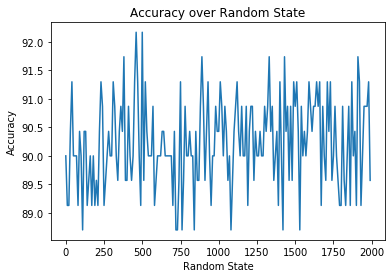

In [9]:
plt.plot(random_state_list,accuracy_list)

plt.title("Accuracy over Random State")
plt.xlabel('Random State')
plt.ylabel('Accuracy')

Looks like the number of classifiers does not matter

Convolutional Neural Network:

In [10]:
heart = pd.read_csv('heart.csv')

heart['Age'] = heart['Age']/max(heart['Age'])
heart['RestingBP'] = heart['RestingBP']/max(heart['RestingBP'])
heart['Cholesterol'] = heart['Cholesterol']/max(heart['Cholesterol'])
heart['MaxHR'] = heart['MaxHR']/max(heart['MaxHR'])
heart['Oldpeak'] = heart['Oldpeak']/max(heart['Oldpeak'])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2688      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100)

Epoch 1/10
7/7 [==============================] - 2s 56ms/step - loss: 3.4378 - accuracy: 0.4680 - val_loss: 1.3481 - val_accuracy: 0.5652
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 1.1819 - accuracy: 0.5916 - val_loss: 0.6621 - val_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.8835 - accuracy: 0.6424 - val_loss: 0.6319 - val_accuracy: 0.7478
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7664 - accuracy: 0.6904 - val_loss: 0.6540 - val_accuracy: 0.7304
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.7020 - val_loss: 0.6765 - val_accuracy: 0.7130
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6652 - accuracy: 0.7108 - val_loss: 0.6311 - val_accuracy: 0.7130
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6024 - accuracy: 0.7413 - val_loss: 0.5643 - val_accuracy: 0.7696
Epoch 8/10
7/7 [=============

In [13]:
from sklearn.pipeline import Pipeline

In [26]:
kpipe=Pipeline(steps=[
        ("model",sk.neighbors.KNeighborsClassifier(30))
])
kpipe.fit(X_train,Y_train)
print("K Nearest Neighbors")
score=kpipe.score(X_test,Y_test)
score

K Nearest Neighbors


0.7043478260869566

It seems as though the random forest is the most effective classifier out of the three tested.